In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

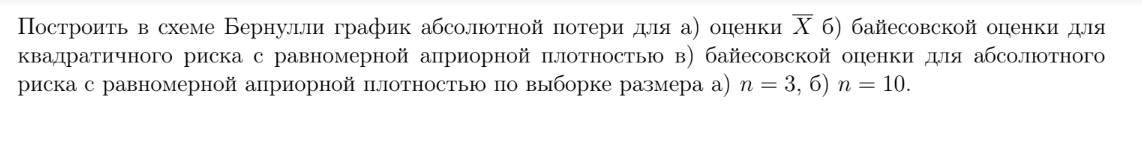

In [11]:
#данные
N = [3, 10]

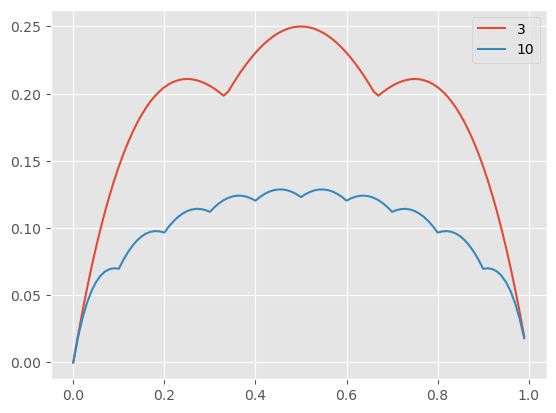

In [16]:
#a)
T = np.arange(0, 1, 0.01)
for n in N:
    Y = []
    for t in T:
        ans = 0
        for x in range(0, n+1):
            if x <= n*t:
                ans += (n*t - x)*sc.stats.binom.pmf(x, n, t, loc=0)
            else:
                ans += (x - n*t)*sc.stats.binom.pmf(x, n, t, loc=0)
        ans /= n
        Y.append(ans)     
    plt.plot(T, Y, label=str(n))
    
plt.legend(loc='best')

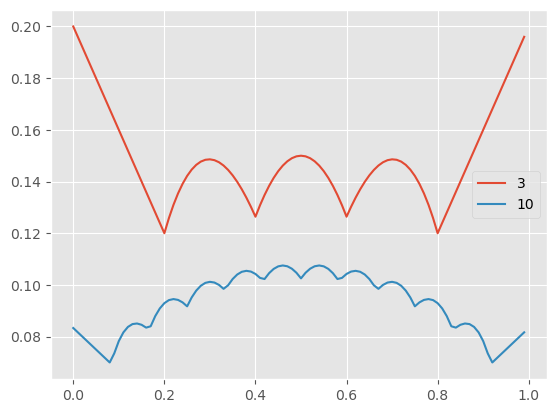

In [26]:
#б) Байес квадратичного риска  - мат. ожидание
# y+1/n+2, y ~ Binom(n, t)

T = np.arange(0, 1, 0.01)
for n in N:
    Y = []
    for t in T:
        ans = 0
        for x in range(0, n+1):
            if (x + 1)/(n + 2) <= t:
                ans += (t - (x + 1)/(n + 2)) * sc.stats.binom.pmf(x, n, t, loc=0)
            else:
                ans -= (t - (x + 1)/(n + 2)) * sc.stats.binom.pmf(x, n, t, loc=0)
        Y.append(ans)
    plt.plot(T, Y, label=str(n))
    
plt.legend(loc='best')

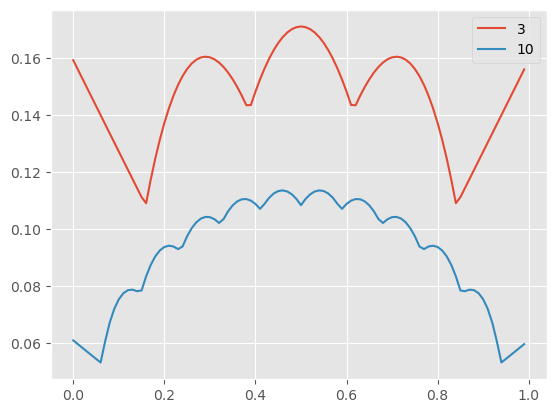

In [33]:
T = np.arange(0, 1, 0.01)
for n in N:
    Y = []
    for t in T:
        ans = 0
        for x in range(0, n+1):
            if sc.stats.beta.ppf(0.5, 1 + x, -x + n + 1) <= t:
                ans += (t - sc.stats.beta.ppf(0.5, 1 + x, -x + n + 1)) * sc.stats.binom.pmf(x, n, t, loc=0)
            else:
                ans -= (t - sc.stats.beta.ppf(0.5, 1 + x, -x + n + 1)) * sc.stats.binom.pmf(x, n, t, loc=0)
        Y.append(ans)
    plt.plot(T, Y, label=str(n))
    
plt.legend(loc='best')